Explained Variance by each component: [0.80703703 0.19296297]


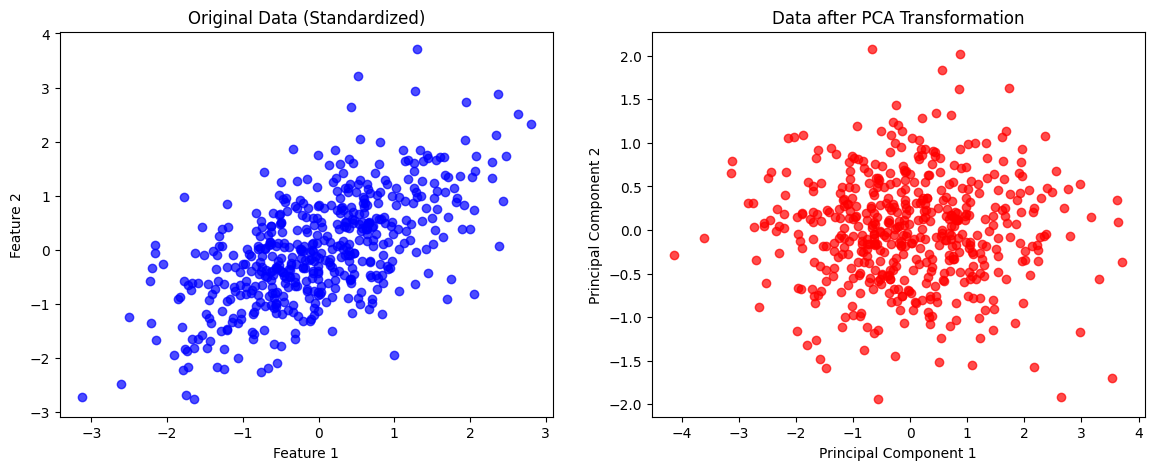

Reconstruction Error: 3.8308669138382775e-32


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generating synthetic data
np.random.seed(40)
mean = [0, 0]
cov = [[4, 2], [2, 3]]  # covariance matrix
data = np.random.multivariate_normal(mean, cov, 500)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Performing PCA
pca = PCA(n_components=2)  # Specifying number of components
pca_data = pca.fit_transform(data_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")

# Plotting the original and transformed data
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Original data
ax[0].scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.7, color='blue')
ax[0].set_title('Original Data (Standardized)')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Transformed data
ax[1].scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.7, color='red')
ax[1].set_title('Data after PCA Transformation')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

plt.show()

# Additional Step: Reconstructing Data from PCA
# Inverse transform to approximate original data using selected components
data_reconstructed = pca.inverse_transform(pca_data)

# Calculating Reconstruction Error
reconstruction_error = np.mean((data_scaled - data_reconstructed) ** 2)
print(f"Reconstruction Error: {reconstruction_error}")


In [6]:
genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=np.random.exponential(scale=5), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=np.random.exponential(scale=5), size=5)

data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,2,0,2,3,1,5,9,5,11,11
gene2,2,0,0,2,1,19,24,22,24,14
gene3,5,8,11,7,14,4,3,2,3,1
gene4,4,8,3,1,3,8,17,9,16,16
gene5,9,6,8,7,9,0,0,0,0,0


In [7]:
data.shape

(100, 10)

In [8]:
from sklearn import preprocessing

scaled_data = preprocessing.scale(data.T)

In [11]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [12]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

<function matplotlib.pyplot.show(close=None, block=None)>

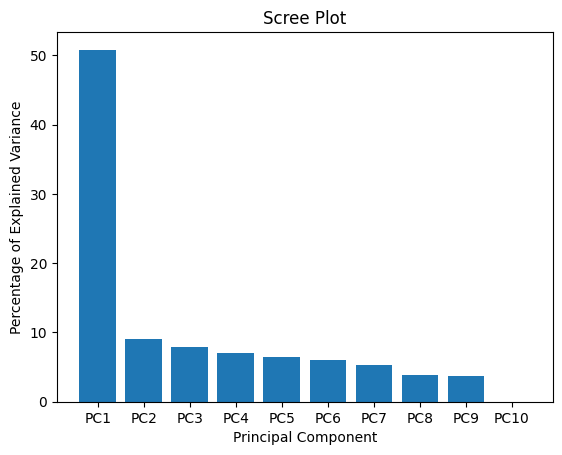

In [13]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show

In [15]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)


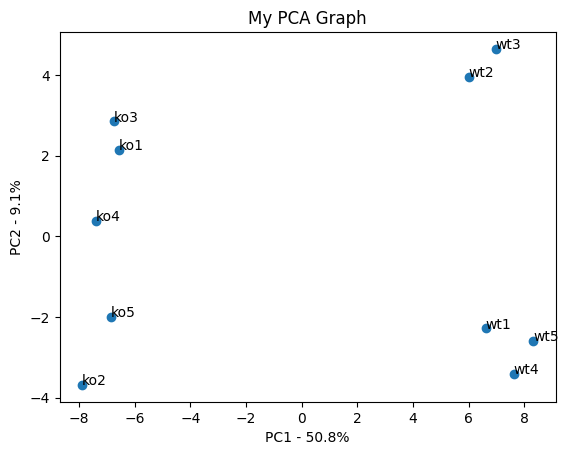

In [17]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [19]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values
print(f"Top 10 genes associated with PC1: {top_10_genes}")

Top 10 genes associated with PC1: ['gene96' 'gene5' 'gene28' 'gene82' 'gene2' 'gene37' 'gene53' 'gene66'
 'gene23' 'gene75']
